In [132]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Load Data_Breaches.csv
data_breaches = pd.read_csv("Data_Breaches.csv")

# Cleaned the columns of the dataset
columns_1 = data_breaches.columns

new_columns_1 = [col.lower().replace(' ', '_') for col in columns_1]

data_breaches.columns = new_columns_1

# Drop unnamed:_0 column
data_breaches = data_breaches.drop(columns=["unnamed:_0"])

# Drop sources column
data_breaches = data_breaches.drop(columns=["sources"])

# Rename entity to organization
data_breaches.rename(columns={'entity': 'organization'}, inplace=True)

data_breaches.head()



,organization,year,records,organization_type,method
0,21st Century Oncology,2016,2200000,healthcare,hacked
1,500px,2020,14870304,social networking,hacked
2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,Adobe Inc.,2019,7500000,tech,poor security


In [133]:
# Check for sum of null values in each column
data_breaches.isna().sum()

organization         0
year                 0
records              2
organization_type    0
method               1
dtype: int64

## Data Cleaning

In [134]:
# data_breaches['records'].fillna(method='ffill')

# Convert 'Records' column from string to integer, replacing non-numeric values with NaN
data_breaches['records'] = pd.to_numeric(data_breaches['records'], errors='coerce')

# Fills in NaN values in the records column with the mean
data_breaches['records'] = data_breaches.records.fillna(data_breaches.records.mean())

# Converts the values in the records column to an int
data_breaches['records'] = data_breaches['records'].astype(int)

# Forward fills in Nan values in the records column 
# data_breaches['records'] = data_breaches['records'].fillna(method='ffill')

# Replace NaN values in the method column with unknown
data_breaches['method'] = data_breaches['method'].fillna('unknown')

data_breaches.head(50)

,organization,year,records,organization_type,method
0,21st Century Oncology,2016,2200000,healthcare,hacked
1,500px,2020,14870304,social networking,hacked
2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,Adobe Inc.,2019,7500000,tech,poor security
5,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media
6,AerServ (subsidiary of InMobi),2018,75000,advertising,hacked
7,"Affinity Health Plan, Inc.",2013,344579,healthcare,lost / stolen media
8,Airtel,2019,320000000,telecommunications,poor security
9,Air Canada,2018,20000,transport,hacked


In [136]:
data_breaches.isna().sum()


organization         0
year                 0
records              0
organization_type    0
method               0
dtype: int64

In [137]:
data_breaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   organization       352 non-null    object
 1   year               352 non-null    object
 2   records            352 non-null    int32 
 3   organization_type  352 non-null    object
 4   method             352 non-null    object
dtypes: int32(1), object(4)
memory usage: 12.5+ KB


In [138]:
# Load World_Data_Breaches.csv
world_data_breaches = pd.read_csv("World_Data_Breaches.csv")

# Cleaned the columns of the dataset
columns_2 = world_data_breaches.columns

new_columns_2 = [col.lower().replace(' ', '_').replace('year___', 'year') for col in columns_2]

world_data_breaches.columns = new_columns_2

# Drop alternative_name column
world_data_breaches = world_data_breaches.drop(columns=["alternative_name"])

# Drop unnamed:_11 column
world_data_breaches = world_data_breaches.drop(columns=["unnamed:_11"])

# Drop 2nd_source_link column
world_data_breaches = world_data_breaches.drop(columns=["2nd_source_link"])

# Drop interesting_story column
world_data_breaches = world_data_breaches.drop(columns=["interesting_story"])

# Drop displayed_records column as it mostly contains NaN values
world_data_breaches = world_data_breaches.drop(columns=["displayed_records"])

# Drop id column as it doesn't have any significance to the dataset
world_data_breaches = world_data_breaches.drop(columns=["id"])

# Rename columns
world_data_breaches.rename(columns={'organisation': 'organization'}, inplace=True)

world_data_breaches.rename(columns={'1st_source_link': 'source_link'}, inplace=True)

world_data_breaches.rename(columns={'sector': 'organization_type'}, inplace=True)

world_data_breaches.rename(columns={'records_lost': 'records'}, inplace=True)

# Drop row 0 as it contains general info(not pertaining to the data)
world_data_breaches.drop(index=0, inplace=True)


# Rearrange the column names to match with the ones given in data_breaches
world_data_breaches = pd.DataFrame(world_data_breaches)

world_data_breaches_reordered = ['organization', 'date', 'year', 'records','organization_type', 
                                 'method', 'data_sensitivity', 'story', 'source_name', 'source_link']

world_data_breaches = world_data_breaches[world_data_breaches_reordered]

world_data_breaches.head()

,organization,date,year,records,organization_type,method,data_sensitivity,story,source_name,source_link
1,Plex,Aug-22,2022,"15,000,000",web,hacked,1,"Intruders access password data, usernames, and...",Ars technica,https://arstechnica.com/information-technology...
2,Twitter,Dec-21,2021,"5,400,000",web,hacked,2,Zero day vulnerability allowed a threat actor ...,Bleeping Computer,https://www.bleepingcomputer.com/news/security...
3,Shanghai Police,Jul-22,2022,"500,000,000",financial,hacked,5,A database containing records of over a billio...,The Register,https://www.theregister.com/2022/07/05/shangha...
4,"City of Amagasaki, Japan",Jun-22,2022,"500,000",government,oops!,3,An unnamed government official lost his bag af...,BBC,https://www.bbc.co.uk/news/world-asia-61921222
5,Dubai Real Estate Leak,May-22,2022,"800,000",financial,inside job,1,"Data leak exposes how criminals, officials, an...",E24,https://e24.no/internasjonal-oekonomi/i/Bj97B0...


In [139]:
# Check for sum of null values in each column
world_data_breaches.isna().sum()

organization         0
date                 0
year                 0
records              0
organization_type    0
method               0
data_sensitivity     1
story                6
source_name          0
source_link          1
dtype: int64

In [158]:
# Sorts the dataset into alphabetical order, based on organization name
world_data_breaches = world_data_breaches.sort_values(by='organization', ascending=True)
world_data_breaches.reset_index(drop=True, inplace=True)
world_data_breaches.index += 1

# Removes quotation marks from any organization name
world_data_breaches['organization'] = world_data_breaches['organization'].str.replace('"','')

# custom_order = ['8fit', '500px']
# world_data_breaches = world_data_breaches.loc[world_data_breaches['organization'].isin(custom_order)].append(world_data_breaches.loc[~world_data_breaches['organization'].isin(custom_order)].sort_values('organization'))

# Replace oops with unknown in the method column
world_data_breaches['method'] = world_data_breaches['method'].str.replace('oops!','unknown')

# Replace NaN values in the story column with unknown
world_data_breaches['story'] = world_data_breaches['story'].fillna('unknown')

# Forward fills in NaN values in the data_sensitivity column
world_data_breaches['data_sensitivity'] = world_data_breaches['data_sensitivity'].fillna(method='ffill')

# Replace NaN values in the source_link column with unknown
world_data_breaches['source_link'] = world_data_breaches['source_link'].fillna('unknown')

world_data_breaches.head(50)

C:\Users\ishus\AppData\Local\Temp\ipykernel_68120\1294944113.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  world_data_breaches['data_sensitivity'] = world_data_breaches['data_sensitivity'].fillna(method='ffill')


,organization,date,year,records,organization_type,method,data_sensitivity,story,source_name,source_link
1,500px,Feb 2019,2019,14800000,web,hacked,2,A July 2018 hack exposed the personal informat...,PetaPixel,https://petapixel.com/2019/02/13/500px-hacked-...
2,8fit,Feb 2019,2019,20000000,web,hacked,1,Part of the theft of 617 million online accoun...,The Register,https://www.theregister.co.uk/2019/02/11/620_m...
3,AOL,Jun 2004,2004,92000000,web,inside job,1,A former America Online software engineer stol...,CNN,http://money.cnn.com/2004/06/23/technology/aol...
4,AOL,Apr 2014,2014,2400000,web,hacked,1,User accounts were compromised in order to sen...,NBC News,https://www.nbcnews.com/tech/security/youve-go...
5,AOL,Aug 2006,2006,20000000,web,unknown,1,AOL released search data for roughly 20 millio...,Tech Crunch,http://techcrunch.com/2006/08/06/aol-proudly-r...
6,AT&T,Jun 2008,2008,113000,telecoms,lost device,1,A laptop containing unencrypted Social Securit...,NetworkWorld,https://www.networkworld.com/article/2344552/s...
7,AT&T,Jun 2010,2010,114000,telecoms,hacked,1,"Details of iPad 3G users, thought to include t...",Guardian,http://www.guardian.co.uk/technology/2010/jun/...
8,Aadhaar,Mar 2018,2018,550000000,government,poor security,4,India's biometric database was breached via a ...,ZDNet,http://www.zdnet.com/article/another-data-leak...
9,Accendo Insurance Co.,Jun 2011,2011,175350,health,poor security,2,Mismailed letters allowed some lines of sensit...,Data Breaches,http://www.databreaches.net/?p=19198
10,Acer,Oct-21,2021,3000000,tech,hacked,1,unknown,Hot Hardware,https://hothardware.com/news/acer-confirms-hac...


In [141]:
world_data_breaches.isna().sum()

organization         0
date                 0
year                 0
records              0
organization_type    0
method               0
data_sensitivity     0
story                0
source_name          0
source_link          0
dtype: int64

In [143]:
world_data_breaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 1 to 417
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   organization       417 non-null    object
 1   date               417 non-null    object
 2   year               417 non-null    object
 3   records            417 non-null    object
 4   organization_type  417 non-null    object
 5   method             417 non-null    object
 6   data_sensitivity   417 non-null    object
 7   story              417 non-null    object
 8   source_name        417 non-null    object
 9   source_link        417 non-null    object
dtypes: object(10)
memory usage: 32.7+ KB


In [159]:
# world_data_breaches['records'] = world_data_breaches['records'].str.replace(',', '')
# world_data_breaches['records'] = pd.to_numeric(world_data_breaches['records'], errors='coerce')

# Convert 'records' column to string type
world_data_breaches['records'] = world_data_breaches['records'].astype(str)

# Remove commas from 'records' column and convert it to numeric type
world_data_breaches['records'] = pd.to_numeric(world_data_breaches['records'].str.replace(',', ''), errors='coerce')
world_data_breaches

,organization,date,year,records,organization_type,method,data_sensitivity,story,source_name,source_link
1,500px,Feb 2019,2019,14800000,web,hacked,2,A July 2018 hack exposed the personal informat...,PetaPixel,https://petapixel.com/2019/02/13/500px-hacked-...
2,8fit,Feb 2019,2019,20000000,web,hacked,1,Part of the theft of 617 million online accoun...,The Register,https://www.theregister.co.uk/2019/02/11/620_m...
3,AOL,Jun 2004,2004,92000000,web,inside job,1,A former America Online software engineer stol...,CNN,http://money.cnn.com/2004/06/23/technology/aol...
4,AOL,Apr 2014,2014,2400000,web,hacked,1,User accounts were compromised in order to sen...,NBC News,https://www.nbcnews.com/tech/security/youve-go...
5,AOL,Aug 2006,2006,20000000,web,unknown,1,AOL released search data for roughly 20 millio...,Tech Crunch,http://techcrunch.com/2006/08/06/aol-proudly-r...
...,...,...,...,...,...,...,...,...,...,...
413,Zomato,May 2017,2017,17000000,web,hacked,4,Stolen email addresses and hashed passwords we...,HackRead,https://www.hackread.com/zomato-hacked-17-mill...
414,Zoom,Apr 2020,2020,500000,app,hacked,1,"Email addresses, passwords and personal meetin...",We Live Security,https://www.welivesecurity.com/2020/04/16/half...
415,db8151dd,May 2020,2020,22000000,web,hacked,2,Aggregated data from multiple websites was dis...,9 to 5 Mac,https://9to5mac.com/2020/05/15/db8151dd/
416,ssndob.ms,Sep 2013,2013,4000000,web,hacked,2,"Teenage hackers collected data for exposed.su,...",Krebs on Security,http://krebsonsecurity.com/2013/09/data-broker...


In [147]:
world_data_breaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 1 to 417
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   organization       417 non-null    object
 1   date               417 non-null    object
 2   year               417 non-null    object
 3   records            417 non-null    int64 
 4   organization_type  417 non-null    object
 5   method             417 non-null    object
 6   data_sensitivity   417 non-null    object
 7   story              417 non-null    object
 8   source_name        417 non-null    object
 9   source_link        417 non-null    object
dtypes: int64(1), object(9)
memory usage: 32.7+ KB


## Data Concatenating

In [178]:
# merged_dataset = pd.merge(data_breaches, world_data_breaches, on='organization_type')
# merged_dataset.head(50)

concatenated_df = pd.concat([data_breaches, world_data_breaches], ignore_index=True)

# concatenated_df['Year'] = concatenated_df['Year'].str.split('-').str[0]
# concatenated_df['year'] = concatenated_df['year'].astype(int)

# After concatenating the data, year is converted to an int value
def extract_year(year):
    if '-' in year:
        return int(year.split('-')[0])
    elif 'and' in year:
        return int(year.split('and')[0])
    else:
        return int(year)
    
concatenated_df['year'] = concatenated_df['year'].apply(extract_year)

concatenated_df['organization'] = concatenated_df['organization'].replace('2018 British Airways cyberattack','British Airways')
concatenated_df['organization'] = concatenated_df['organization'].replace('2019 Bulgarian revenue agency hack','Bulgarian Revenue Agency')

concatenated_df.head(50)

# merge_df = pd.merge(data_breaches, world_data_breaches, on='organization', how='inner')
# merge_df.head(50)

,organization,year,records,organization_type,method,date,data_sensitivity,story,source_name,source_link
0,21st Century Oncology,2016,2200000,healthcare,hacked,NaN,NaN,NaN,NaN,NaN
1,500px,2020,14870304,social networking,hacked,NaN,NaN,NaN,NaN,NaN
2,Accendo Insurance Co.,2020,175350,healthcare,poor security,NaN,NaN,NaN,NaN,NaN
3,Adobe Systems Incorporated,2013,152000000,tech,hacked,NaN,NaN,NaN,NaN,NaN
4,Adobe Inc.,2019,7500000,tech,poor security,NaN,NaN,NaN,NaN,NaN
5,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media,NaN,NaN,NaN,NaN,NaN
6,AerServ (subsidiary of InMobi),2018,75000,advertising,hacked,NaN,NaN,NaN,NaN,NaN
7,"Affinity Health Plan, Inc.",2013,344579,healthcare,lost / stolen media,NaN,NaN,NaN,NaN,NaN
8,Airtel,2019,320000000,telecommunications,poor security,NaN,NaN,NaN,NaN,NaN
9,Air Canada,2018,20000,transport,hacked,NaN,NaN,NaN,NaN,NaN


In [179]:
# duplicates = concatenated_df[concatenated_df.duplicated()]
# duplicates

concatenated_df.duplicated(subset=['organization']).sum()

187

In [169]:
# if there are duplicate occurances of the same cyberattack, it will be dropped
# concatenated_df.drop_duplicates(subset=['year', 'organization'], keep='first')
# concatenated_df.drop_duplicates(inplace=True)
# concatenated_df['records'] = concatenated_df['records'].astype(int)
# concatenated_df
duplicates_org = concatenated_df['organization'].duplicated()
duplicates_org.head(40)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
Name: organization, dtype: bool

In [175]:
duplicates_org = concatenated_df[['organization', 'year']].duplicated()
duplicates_org.head(100)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [151]:
concatenated_df.duplicated().sum()

0

In [152]:
concatenated_df.isna().sum()

organization           0
year                   0
records                0
organization_type      0
method                 0
date                 352
data_sensitivity     352
story                352
source_name          352
source_link          352
dtype: int64

In [153]:
concatenated_df['records'].unique()

array([    2200000,    14870304,      175350,   152000000,     7500000,
           4000000,       75000,      344579,   320000000,       20000,
          43797808,      200000,      300000,    46000000,      156000,
          80000000,    92000000,    20000000,     2400000,    12367232,
            275000,       91000,    32000000,      113000,      114000,
          18000000,      125000,     1220000,      250000,    12500000,
           1200000,     1900000,      100000,    35040000,     2300000,
           7633234,    14000000,     1023209,       90000,      500000,
            800000,   140000000,      350000,   106000000,    40000000,
           9400000,     1100000,       60000,      110000,     5000000,
          56000000,     6000000,    10000000,     3900000,      360083,
            150000,      160000,      105470,     4500000,    55000000,
           1000000,     2600000,     2500000,       40000,     1107034,
           8637405,     8000000,       19252,       30000,     9

In [154]:
# concatenated_df.isnull().sum()
# checks the data type for each of the column
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   organization       769 non-null    object
 1   year               769 non-null    int64 
 2   records            769 non-null    int64 
 3   organization_type  769 non-null    object
 4   method             769 non-null    object
 5   date               417 non-null    object
 6   data_sensitivity   417 non-null    object
 7   story              417 non-null    object
 8   source_name        417 non-null    object
 9   source_link        417 non-null    object
dtypes: int64(2), object(8)
memory usage: 60.2+ KB


In [155]:
# concatenated_df['records'] = pd.to_numeric(concatenated_df['records'])
# concatenated_df['records'] = concatenated_df['records'].str.replace(',', '').astype(float)
# concatenated_df['records'] = concatenated_df['records']..replace(',', '')
# concatenated_df['records'] = pd.to_numeric(concatenated_df['records'], errors='coerce')
# concatenated_df

## Exploratory Data Analysis

In [156]:
# Calculates number of attacks per year
# Line graph
attacks_per_year = concatenated_df['year'].value_counts().sort_index()
print(attacks_per_year)

year
2004     3
2005     9
2006    12
2007    22
2008    35
2009    22
2010    32
2011    71
2012    46
2013    63
2014    45
2015    53
2016    55
2017    34
2018    68
2019    76
2020    59
2021    47
2022    17
Name: count, dtype: int64


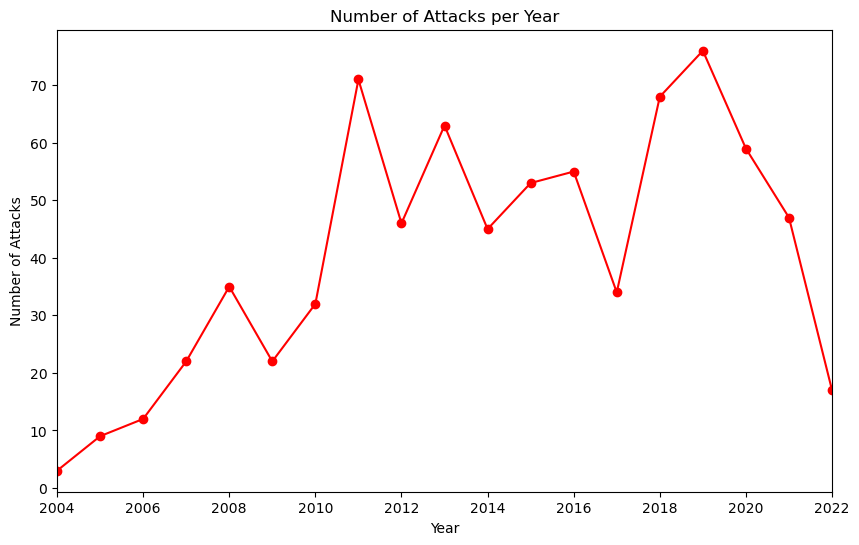

In [192]:
attacks_per_year = concatenated_df.groupby('year').size()

plt.figure(figsize=(10, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', color='red')

#sns.lineplot(x='year', y='count', data=attacks_per_year, marker='o', color='blue')
# plt.xticks(range(1, 19)), ['2004', '2005', '2006', '2007', '2008', 
# '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
# '2019', '2020', '2021', '2022']

plt.title('Number of Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
#plt.grid(True)
plt.xlim(2004, 2022)

plt.show()


In [157]:
# Calculates the number of records lost for each year 
# Line graph
concatenated_df['records'] = pd.to_numeric(concatenated_df['records'], errors='coerce')
records_lost_per_year = concatenated_df.groupby('year')['records'].sum()
print(records_lost_per_year)

year
2004     184510000
2005      90925000
2006     122085000
2007     303883810
2008     145322000
2009     501363387
2010      25763761
2011     472822107
2012     694563620
2013    -318434576
2014    1496600052
2015    1078691761
2016    2518813630
2017    1620351610
2018    4426588942
2019    6049111740
2020    2079134612
2021    2565958773
2022     550770960
Name: records, dtype: int64


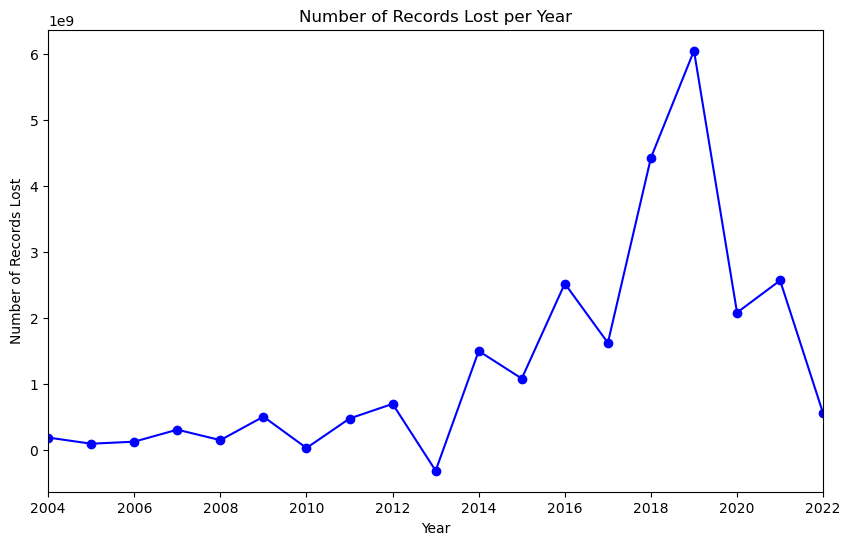

In [197]:
records_lost_per_year = concatenated_df.groupby('year')['records'].sum()

plt.figure(figsize=(10, 6))
plt.plot(records_lost_per_year.index, records_lost_per_year.values, marker='o', color='blue')

#sns.lineplot(x='year', y='count', data=attacks_per_year, marker='o', color='blue')
# plt.xticks(range(1, 19)), ['2004', '2005', '2006', '2007', '2008', 
# '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
# '2019', '2020', '2021', '2022']

plt.title('Number of Records Lost per Year')
plt.xlabel('Year')
plt.ylabel('Number of Records Lost')
#plt.grid(True)
plt.xlim(2004, 2022)
# plt.yscale('log')

plt.show()


In [180]:
# Calculates the number of records lost per org
records_lost_per_org = concatenated_df.groupby('organization')['records'].sum()
print(records_lost_per_org)

organization
21st Century Oncology                         2200000
50 companies and government institutions      6400000
500px                                        29670304
8fit                                         20000000
AOL                                         228800000
                                              ...    
Zynga                                       173000000
db8151dd                                     22000000
eBay                                        145000000
ssndob.ms                                     4000000
uTorrent                                        35000
Name: records, Length: 582, dtype: int64


In [185]:
# Calculates the number of records lost per org_type
# Bar graph
records_lost_per_org_type = concatenated_df.groupby('organization_type')['records'].sum()
print(records_lost_per_org_type)

organization_type
Clinical Laboratory      11900000
Consumer Goods          150000000
Information Security     43797808
NGO                        500000
Network Monitoring       43797808
                          ...    
web                     877000000
web service              43797808
web, gaming              64000000
web, military              327584
web, tech                 9300000
Name: records, Length: 82, dtype: int64


In [182]:
# Calculates the number of records lost for web
web_records = concatenated_df[concatenated_df['organization_type'] == 'web']
total_records_lost_web = web_records['records'].sum()
print(total_records_lost_web)

6376875181


In [183]:
concatenated_df

,organization,year,records,organization_type,method,date,data_sensitivity,story,source_name,source_link
0,21st Century Oncology,2016,2200000,healthcare,hacked,NaN,NaN,NaN,NaN,NaN
1,500px,2020,14870304,social networking,hacked,NaN,NaN,NaN,NaN,NaN
2,Accendo Insurance Co.,2020,175350,healthcare,poor security,NaN,NaN,NaN,NaN,NaN
3,Adobe Systems Incorporated,2013,152000000,tech,hacked,NaN,NaN,NaN,NaN,NaN
4,Adobe Inc.,2019,7500000,tech,poor security,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
764,Zomato,2017,17000000,web,hacked,May 2017,4,Stolen email addresses and hashed passwords we...,HackRead,https://www.hackread.com/zomato-hacked-17-mill...
765,Zoom,2020,500000,app,hacked,Apr 2020,1,"Email addresses, passwords and personal meetin...",We Live Security,https://www.welivesecurity.com/2020/04/16/half...
766,db8151dd,2020,22000000,web,hacked,May 2020,2,Aggregated data from multiple websites was dis...,9 to 5 Mac,https://9to5mac.com/2020/05/15/db8151dd/
767,ssndob.ms,2013,4000000,web,hacked,Sep 2013,2,"Teenage hackers collected data for exposed.su,...",Krebs on Security,http://krebsonsecurity.com/2013/09/data-broker...


In [ ]:
#Bar graph
categories = concatenated_df['organization_type']
values = concatenated_df['records']
plt.bar(categories, values)

plt.title('')
